In [375]:
# asd = "/workspace/data/segmentation_dataset_512/json_mix_with_score/mix/ASD/20160120_ASD_lat__V1-0001.json"
asd = "/workspace/data/segmentation_dataset_512/json_mix_with_score/mix/ASD/20160523_1_ASD_lat__V1-0002.json"
asd = "/workspace/data/segmentation_dataset_512/json_mix_with_score/mix/ASD/20170313_ASD_lat_V1-0001.json"
dhs = "/workspace/data/segmentation_dataset_512/json_mix_with_score/mix/DHS/20160927_DHS_lat_V1-0001.json"
lcs_hipoa = "/workspace/data/segmentation_dataset_512/json_mix_with_score/mix/LCS_HipOA/20170919_HipOA_lat_V1-0002.json"

In [376]:
# multi cue path 
asd_multi = "/workspace/data/multi_cue_dataset/pt_gz/ASD/20170313_ASD_lat_V1-0001.pt.gz"
dhs_multi = "/workspace/data/multi_cue_dataset/pt_gz/DHS/20160927_DHS_lat_V1-0001.pt.gz"
lcs_hipoa_multi = "/workspace/data/multi_cue_dataset/pt_gz/LCS_HipOA/20170919_HipOA_lat_V1-0002.pt.gz"

In [377]:
one_file = dhs
one_file_multi = dhs_multi

In [378]:
# load pt gz files
import gzip
import torch

with gzip.open(one_file_multi, 'rb') as f:
	one_data_multi = torch.load(f)

In [379]:
import json

with open(one_file, 'r') as file:
    one_data = json.load(file)

In [380]:
one_data.keys(), one_data_multi.keys()

(dict_keys(['bbox', 'disease', 'filter_info', 'frame_count', 'gait_cycle_index', 'label', 'none_index', 'video_name', 'video_path']),
 dict_keys(['video', 'frames', 'label', 'total_frames', 'img_shape', 'bbox_none_index', 'optical_flow', 'bbox', 'mask', 'keypoint', 'keypoint_score']))

In [381]:
from torchvision.io import read_video

vframes, *_ = read_video(one_data["video_path"], pts_unit='sec', output_format='TCHW')
vframes.shape

torch.Size([120, 3, 512, 512])

In [382]:
one_data_filter_info = one_data["filter_info"]
one_data_filter_info.keys()

dict_keys(['first_phase', 'second_phase'])

In [383]:
one_data["video_path"]

'/workspace/data/segmentation_dataset_512/fold0/train/ASD_not/20160927_DHS_lat_V1-0001.mp4'

In [384]:
first_phase = one_data_filter_info['first_phase']
second_phase = one_data_filter_info['second_phase']

In [385]:
first_phase.keys()
first_phase['fold0'].keys()

dict_keys(['filtered_scores', 'sorted_idx'])

In [386]:
first_filtered_scores = first_phase['fold0']['filtered_scores']
first_sorted_idx = first_phase['fold0']['sorted_idx']

second_filtered_scores = second_phase['fold0']['filtered_scores']
second_sorted_idx = second_phase['fold0']['sorted_idx']



In [387]:
import torch

def normalize_scores(scores):
	scores_tensor = torch.tensor(scores)
	res = (scores_tensor - scores_tensor.min()) / (scores_tensor.max() - scores_tensor.min())
	return res.tolist()


In [388]:
max_idx = max(len(first_filtered_scores), len(second_filtered_scores))

combined_scores = []
for l, r in zip(first_filtered_scores, second_filtered_scores):
	print(len(l), len(r))
	combined_scores += normalize_scores(l) + normalize_scores(r)

if len(first_filtered_scores) != len(second_filtered_scores):
	combined_scores += normalize_scores(first_filtered_scores[max_idx-1])

assert len(combined_scores) == vframes.shape[0]

combined_scores_idx = []
for l, r in zip(first_sorted_idx, second_sorted_idx):
	print(len(l), len(r))
	combined_scores_idx += l + r

if len(first_sorted_idx) != len(second_sorted_idx):
	combined_scores_idx += first_sorted_idx[max_idx-1]

assert len(combined_scores_idx) == vframes.shape[0]




15 15
16 16
17 15
17 9
15 15
16 16
17 15
17 9


In [389]:
vframes.shape

torch.Size([120, 3, 512, 512])

In [390]:
len(first_filtered_scores), len(second_filtered_scores)

(4, 4)

In [391]:
combined_scores, combined_scores_idx

([0.5894342064857483,
  0.0,
  0.2605229616165161,
  0.039804283529520035,
  0.45506173372268677,
  0.41925475001335144,
  0.5092112421989441,
  0.602127730846405,
  0.5336079001426697,
  0.5834627747535706,
  1.0,
  0.5062025785446167,
  0.701788604259491,
  0.6696361303329468,
  0.8095816969871521,
  0.0,
  0.19776971638202667,
  1.0,
  0.6827405691146851,
  0.6124537587165833,
  0.9172243475914001,
  0.694481372833252,
  0.9562656283378601,
  0.8321630358695984,
  0.4387253522872925,
  0.2517644464969635,
  0.23324619233608246,
  0.1272737830877304,
  0.793119490146637,
  0.8170474767684937,
  1.0,
  0.37606555223464966,
  0.17478395998477936,
  0.5103942155838013,
  0.23692631721496582,
  0.26532965898513794,
  0.7876603007316589,
  0.8259965777397156,
  0.9408913850784302,
  0.7678862810134888,
  0.8197301030158997,
  0.0,
  0.7296746373176575,
  0.6143630743026733,
  0.7357955574989319,
  0.22959072887897491,
  0.8322693109512329,
  1.0,
  0.6947975158691406,
  0.616456151008606,

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

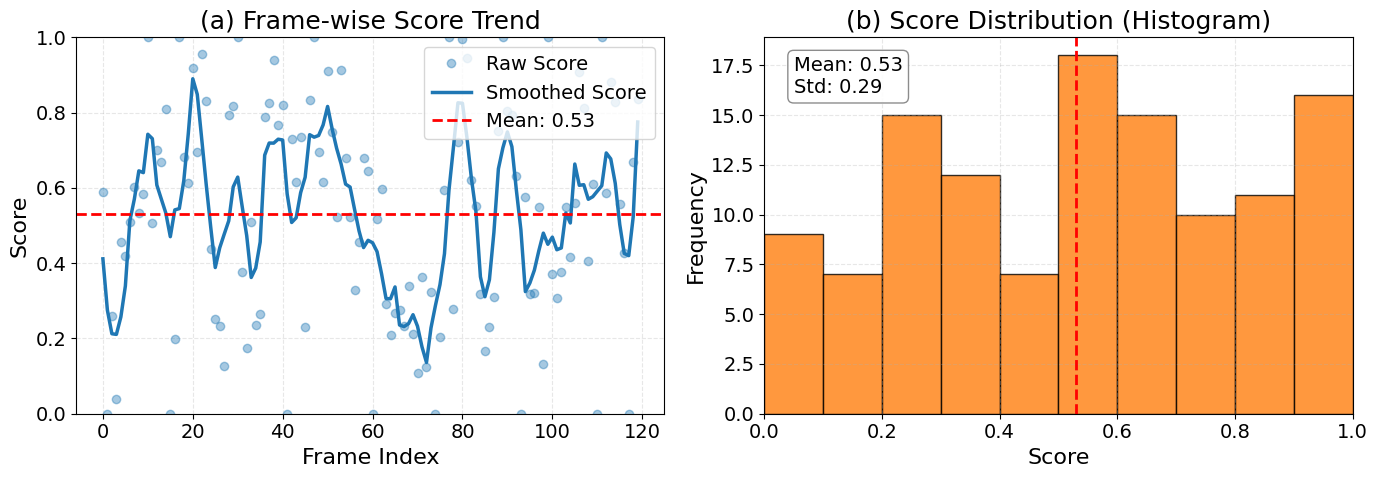

In [392]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

# 示例数据
scores = combined_scores
frame_indices = list(range(len(scores)))
mean_score = np.mean(scores)
std_score = np.std(scores)

# 平滑曲线
smooth_scores = savgol_filter(scores, window_length=11, polyorder=3)

# 设置全局字体
plt.rcParams.update({
    'font.size': 14,
    # 'font.family': 'Times New Roman',
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14
})

# 创建子图
fig, axs = plt.subplots(1, 2, figsize=(14, 5))  # 更大画布

# --- (a) Frame-wise Score Trend ---
axs[0].plot(frame_indices, scores, marker='o', linestyle='', alpha=0.4, label='Raw Score', color='tab:blue')
axs[0].plot(frame_indices, smooth_scores, linewidth=2.5, label='Smoothed Score', color='tab:blue')
axs[0].axhline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.2f}')
axs[0].set_title("(a) Frame-wise Score Trend")
axs[0].set_xlabel("Frame Index")
axs[0].set_ylabel("Score")
axs[0].set_ylim(0, 1)
axs[0].grid(True, linestyle='--', alpha=0.3)
axs[0].legend(loc='upper right')

# --- (b) Score Histogram ---
axs[1].hist(scores, bins=10, edgecolor='black', color='tab:orange', alpha=0.8)
axs[1].axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.2f}')
axs[1].set_title("(b) Score Distribution (Histogram)")
axs[1].set_xlabel("Score")
axs[1].set_ylabel("Frequency")
axs[1].set_xlim(0, 1)
axs[1].grid(True, linestyle='--', alpha=0.3)

# 注释文本框
textstr = f'Mean: {mean_score:.2f}\nStd: {std_score:.2f}'
axs[1].text(0.05, 0.95, textstr, transform=axs[1].transAxes,
            fontsize=14, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.9))

# 紧凑布局与可选保存
plt.tight_layout()
# plt.savefig("figure/frame_score_trend.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [393]:
import matplotlib.pyplot as plt

def plot_sample_visualization(original_frames, scores, selected_indices, removed_indices, entropy_list, flow_magnitude_list):
    fig, axs = plt.subplots(5, 1, figsize=(14, 10))

    # 1. 原始帧序列
    for i, frame in enumerate(original_frames):
        axs[0].imshow(frame)
        axs[0].set_title("Original Frame #" + str(i))
    
    # 2. 保留帧
    for i in selected_indices:
        axs[1].imshow(original_frames[i])
        axs[1].set_title(f"Selected Frame #{i}, Score: {scores[i]:.2f}")

    # 3. 去除帧（可选）
    for i in removed_indices:
        axs[2].imshow(original_frames[i])
        axs[2].set_title(f"Removed Frame #{i}, Score: {scores[i]:.2f}")

    # 4. 分数折线图
    axs[3].plot(scores, marker='o', label='Score')
    axs[3].scatter(selected_indices, [scores[i] for i in selected_indices], color='red', label='Selected')
    axs[3].set_title("FilterNet Scores")
    axs[3].legend()

    # 5. 帧信息统计图
    axs[4].plot(entropy_list, label='Entropy')
    axs[4].plot(flow_magnitude_list, label='Optical Flow Magnitude')
    axs[4].set_title("Frame Statistics")
    axs[4].legend()

    plt.tight_layout()
    plt.show()


# compare the difference between frames in the gait cycle

In [394]:
gait_cycle_index = one_data["gait_cycle_index"]

In [395]:
def split_gait_cycle(
    video_tensor: torch.Tensor, gait_cycle_index: list, gait_cycle: int
):

    use_idx = []
    ans_list = []

    if gait_cycle == 0 or len(gait_cycle_index) == 2:
        for i in range(0, len(gait_cycle_index) - 1, 2):
            ans_list.append(
                video_tensor[gait_cycle_index[i] : gait_cycle_index[i + 1], ...]
            )
            use_idx.append(gait_cycle_index[i])

    elif gait_cycle == 1:

        for i in range(1, len(gait_cycle_index) - 1, 2):
            ans_list.append(
                video_tensor[gait_cycle_index[i] : gait_cycle_index[i + 1], ...]
            )
            use_idx.append(gait_cycle_index[i])

    # print(f"used split gait cycle index: {use_idx}")

    return ans_list, use_idx  # needed gait cycle video tensor


In [396]:
#  * step1: first find the phase frames (pack) and phase index.
first_phase, first_phase_idx = split_gait_cycle(
            vframes, gait_cycle_index, 0
        )
second_phase, second_phase_idx = split_gait_cycle(
            vframes, gait_cycle_index, 1
        )

first_phase_kpt, first_phase_kpt_idx = split_gait_cycle(
			one_data_multi["keypoint"], gait_cycle_index, 0
		)
second_phase_kpt, second_phase_kpt_idx = split_gait_cycle(
			one_data_multi["keypoint"], gait_cycle_index, 1
		)

first_phase_of, first_phase_of_idx = split_gait_cycle(
			one_data_multi["optical_flow"], gait_cycle_index, 0
		)
second_phase_of, second_phase_of_idx = split_gait_cycle(
			one_data_multi["optical_flow"], gait_cycle_index, 1
		)

In [397]:
first_phase_of[0].shape, first_phase_kpt[0].shape

(torch.Size([15, 2, 512, 512]), torch.Size([15, 17, 2]))

In [398]:
first_phase[0].shape, first_phase_kpt[0].shape

(torch.Size([15, 3, 512, 512]), torch.Size([15, 17, 2]))

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

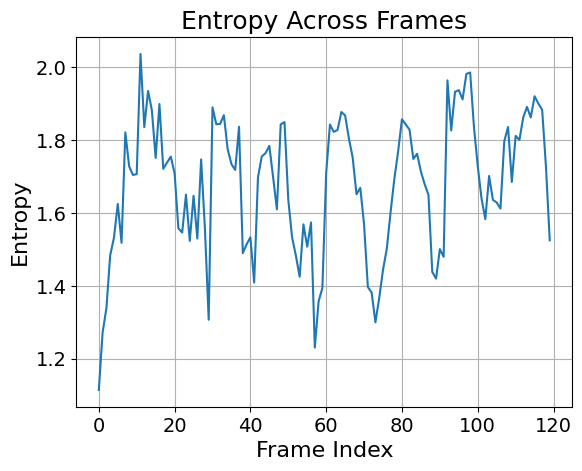

In [399]:
import cv2
import numpy as np

def calculate_entropy(image: np.ndarray) -> float:
    """
    计算单张图像的熵（支持 RGB 或灰度图像）

    Args:
        image (np.ndarray): 输入图像，形状为 (H, W, 3) 或 (H, W)

    Returns:
        float: 图像熵值
    """
    # 转灰度图
    if image.ndim == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    # 计算灰度直方图（0-255，共 256 个 bin）
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist = hist.ravel() / hist.sum()

    # 去掉为 0 的概率值，避免 log(0)
    hist_nonzero = hist[hist > 0]

    # 熵计算公式：-∑p*log2(p)
    entropy = -np.sum(hist_nonzero * np.log2(hist_nonzero))

    return entropy

entropy_list = []

for frame in vframes:  # original_frames 是帧的 np.array 列表
    frame = frame.permute(1, 2, 0).numpy()  # 转换为 HWC 格式
    entropy_val = calculate_entropy(frame)
    entropy_list.append(entropy_val)

import matplotlib.pyplot as plt

plt.plot(entropy_list)
plt.title("Entropy Across Frames")
plt.xlabel("Frame Index")
plt.ylabel("Entropy")
plt.grid(True)
plt.show()


In [400]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def ssim(img1, img2, C1=6.5025, C2=58.5225):
    """
    计算两张灰度图像之间的结构相似度 SSIM。
    参数：
        img1, img2: 输入图像（numpy 数组，灰度图，值范围 0-255）
    返回：
        SSIM 值（单个标量）
    """
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)

    # 计算均值（高斯滤波代替滑窗）
    mu1 = gaussian_filter(img1, sigma=1.5)
    mu2 = gaussian_filter(img2, sigma=1.5)

    mu1_sq = mu1 ** 2
    mu2_sq = mu2 ** 2
    mu1_mu2 = mu1 * mu2

    # 计算方差和协方差
    sigma1_sq = gaussian_filter(img1 ** 2, sigma=1.5) - mu1_sq
    sigma2_sq = gaussian_filter(img2 ** 2, sigma=1.5) - mu2_sq
    sigma12 = gaussian_filter(img1 * img2, sigma=1.5) - mu1_mu2

    # SSIM 公式
    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / \
               ((mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2))

    return ssim_map.mean()

def rgb_to_gray(img):
    """Convert RGB image to grayscale using luminosity method."""
    if img.ndim == 3 and img.shape[2] == 3:
        return np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
    return img

def compute_frame_difference(img1, img2, method='l1'):
    """Compute difference between two frames using L1, MSE, or SSIM."""
    # img1 = rgb_to_gray(img1)
    # img2 = rgb_to_gray(img2)

    if method == 'l1':
        diff = np.abs(img1.astype(np.float32) - img2.astype(np.float32))
        return np.mean(diff)
    elif method == 'mse':
        diff = (img1.astype(np.float32) - img2.astype(np.float32)) ** 2
        return np.mean(diff)
    elif method == 'ssim':
        score = ssim(img1, img2)
        return score  # 差异值：越大表示变化越大
    else:
        raise ValueError("Unsupported method: choose 'l1', 'mse', or 'ssim'")


def compute_avg_variation(indices, all_frames, method='l1'):
    diffs = []
    for i in range(len(indices) - 1):
        f1 = all_frames[indices[i]].numpy()  # CTHW -> HWC
        f2 = all_frames[indices[i + 1]].numpy()
        f1 = np.transpose(f1, (1, 2, 0))  # C,H,W → H,W,C
        f2 = np.transpose(f2, (1, 2, 0))
        diff = compute_frame_difference(f1, f2, method=method)
        diffs.append(diff)
    return np.mean(diffs), diffs


# ----------------------
# 比较均匀采样 vs. FilterNet选择
# ----------------------
def calc_uniform_vs_filternet(frames, phase_idx, uniform_num:int=8, method='ssim'):
	uniform_indices = np.linspace(0, len(frames) - 1, num=uniform_num, dtype=int)  # 从0到len(frames)-1之间均匀选出8个索引
	filternet_indices = sorted(phase_idx[:uniform_num])  # 取前8个索引作为FilterNet选择的示例

	avg_u, diffs_u = compute_avg_variation(uniform_indices, frames, method=method)
	avg_f, diffs_f = compute_avg_variation(filternet_indices, frames, method=method)
	avg_all, diffs_all = compute_avg_variation(list(range(len(frames))), frames, method=method)

	# 打印分析报告
	# print("="*50)
	# print("🧪 Frame Difference Evaluation")
	# print(f"• Uniform Sampling Indices     : {uniform_indices}")
	# print(f"• FilterNet Top-score Indices  : {filternet_indices}")
	# print(f"• All Frames Indices           : {list(range(len(frames)))}")
	# print("-" * 50)
	# print(f"Uniform Sampling   → Avg Δ: {avg_u:.2f} | Std: {np.std(diffs_u):.2f}")
	# print(f"FilterNet Selection → Avg Δ: {avg_f:.2f} | Std: {np.std(diffs_f):.2f}")
	# print("="*50)

	return avg_u, avg_f, diffs_u, diffs_f, avg_all, diffs_all

uniform_ssim = []
filternet_ssim = []
all_ssim = []

for f, idx in zip(first_phase, first_sorted_idx):
	avg_u, avg_f, diffs_u, diffs_f, avg_all, diffs_all = calc_uniform_vs_filternet(f, idx, method='l1')
	uniform_ssim.append(avg_u)
	filternet_ssim.append(avg_f)
	all_ssim.append(avg_all)

for f, idx in zip(second_phase, second_sorted_idx):
	avg_u, avg_f, diffs_u, diffs_f, avg_all, diffs_all = calc_uniform_vs_filternet(f, idx, method='l1')
	uniform_ssim.append(avg_u)
	filternet_ssim.append(avg_f)
	all_ssim.append(avg_all)
     
# 打印最终结果
print("="*50)
print("📊 Overall l1 Analysis")
print(f"Uniform Sampling Avg SSIM: {np.mean(uniform_ssim):.2f} | Std: {np.std(uniform_ssim):.2f}")
print(f"FilterNet Selection Avg SSIM: {np.mean(filternet_ssim):.2f} | Std: {np.std(filternet_ssim):.2f}")
print(f"All Frames Avg SSIM: {np.mean(all_ssim):.2f} | Std: {np.std(all_ssim):.2f}")	
print("="*50)


# mse 
uniform_ssim = []
filternet_ssim = []
all_ssim = []

for f, idx in zip(first_phase, first_sorted_idx):
	avg_u, avg_f, diffs_u, diffs_f, avg_all, diffs_all = calc_uniform_vs_filternet(f, idx, method='mse')
	uniform_ssim.append(avg_u)
	filternet_ssim.append(avg_f)
	all_ssim.append(avg_all)

for f, idx in zip(second_phase, second_sorted_idx):
	avg_u, avg_f, diffs_u, diffs_f, avg_all, diffs_all = calc_uniform_vs_filternet(f, idx, method='mse')
	uniform_ssim.append(avg_u)
	filternet_ssim.append(avg_f)
	all_ssim.append(avg_all)
     
# 打印最终结果
print("="*50)
print("📊 Overall mse Analysis")
print(f"Uniform Sampling Avg SSIM: {np.mean(uniform_ssim):.2f} | Std: {np.std(uniform_ssim):.2f}")
print(f"FilterNet Selection Avg SSIM: {np.mean(filternet_ssim):.2f} | Std: {np.std(filternet_ssim):.2f}")
print(f"All Frames Avg SSIM: {np.mean(all_ssim):.2f} | Std: {np.std(all_ssim):.2f}")
print("="*50)

# ssim
uniform_ssim = []
filternet_ssim = []
all_ssim = []

for f, idx in zip(first_phase, first_sorted_idx):
	avg_u, avg_f, diffs_u, diffs_f, avg_all, diffs_all = calc_uniform_vs_filternet(f, idx, method='ssim')
	uniform_ssim.append(avg_u)
	filternet_ssim.append(avg_f)
	all_ssim.append(avg_all)

for f, idx in zip(second_phase, second_sorted_idx):
	avg_u, avg_f, diffs_u, diffs_f, avg_all, diffs_all = calc_uniform_vs_filternet(f, idx, method='ssim')
	uniform_ssim.append(avg_u)
	filternet_ssim.append(avg_f)
	all_ssim.append(avg_all)
     
# 打印最终结果
print("="*50)
print("📊 Overall SSIM Analysis")
print(f"Uniform Sampling Avg SSIM: {np.mean(uniform_ssim):.2f} | Std: {np.std(uniform_ssim):.2f}")
print(f"FilterNet Selection Avg SSIM: {np.mean(filternet_ssim):.2f} | Std: {np.std(filternet_ssim):.2f}")
print(f"All Frames Avg SSIM: {np.mean(all_ssim):.2f} | Std: {np.std(all_ssim):.2f}")
print("="*50)

📊 Overall l1 Analysis
Uniform Sampling Avg SSIM: 5.54 | Std: 0.57
FilterNet Selection Avg SSIM: 5.08 | Std: 0.53
All Frames Avg SSIM: 4.22 | Std: 0.49
📊 Overall mse Analysis
Uniform Sampling Avg SSIM: 325.99 | Std: 46.58
FilterNet Selection Avg SSIM: 291.36 | Std: 37.48
All Frames Avg SSIM: 226.76 | Std: 29.90
📊 Overall SSIM Analysis
Uniform Sampling Avg SSIM: 0.87 | Std: 0.01
FilterNet Selection Avg SSIM: 0.88 | Std: 0.01
All Frames Avg SSIM: 0.89 | Std: 0.01


In [401]:
import numpy as np

import torch


def compute_avg_motion_from_indices(indices, keypoints: torch.Tensor):
    """
    用 PyTorch 实现：从关键点序列中选定索引，计算连续帧之间平均关键点运动强度。
    
    :param indices: List[int]，帧索引（按顺序）
    :param keypoints: Tensor，shape = [T, 17, 2]
    :return: 平均运动强度, 每对帧的运动强度列表（torch.Tensor）
    """
    diffs = []
    for i in range(len(indices) - 1):
        f1 = keypoints[indices[i]]    # [17, 2]
        f2 = keypoints[indices[i + 1]]
        displacement = f2 - f1        # [17, 2]
        norm = torch.norm(displacement, dim=1)  # [17], 每个点的 L2 位移
        motion = norm.mean()          # 所有点平均
        diffs.append(motion)
    
    diffs_tensor = torch.stack(diffs)  # [N-1]
    return diffs_tensor.mean(), diffs_tensor


def calc_keypoint_motion_vs_filternet(keypoints, phase_idx, uniform_num=8):
    T = keypoints.shape[0]
    uniform_indices = np.linspace(0, T - 1, num=uniform_num, dtype=int)
    filternet_indices = sorted(phase_idx[:uniform_num])

    avg_u, diffs_u = compute_avg_motion_from_indices(uniform_indices, keypoints)
    avg_f, diffs_f = compute_avg_motion_from_indices(filternet_indices, keypoints)
    avg_all, diffs_all = compute_avg_motion_from_indices(list(range(T)), keypoints)

    return avg_u, avg_f, diffs_u, diffs_f, avg_all, diffs_all

uniform_motion = []
filternet_motion = []
all_motion = []

# 替换 first_phase 为关键点序列列表，first_sorted_idx 为排序索引列表
for kpt, idx in zip(first_phase_kpt, first_sorted_idx):
    avg_u, avg_f, _, _, avg_all, _ = calc_keypoint_motion_vs_filternet(kpt, idx)
    uniform_motion.append(avg_u)
    filternet_motion.append(avg_f)
    all_motion.append(avg_all)

for kpt, idx in zip(second_phase_kpt, second_sorted_idx):
    avg_u, avg_f, _, _, avg_all, _ = calc_keypoint_motion_vs_filternet(kpt, idx)
    uniform_motion.append(avg_u)
    filternet_motion.append(avg_f)
    all_motion.append(avg_all)

print("="*50)
print("📊 Keypoint Motion Intensity Analysis")
print(f"Uniform Sampling Avg Motion: {np.mean(uniform_motion):.2f} | Std: {np.std(uniform_motion):.2f}")
print(f"FilterNet Selection Avg Motion: {np.mean(filternet_motion):.2f} | Std: {np.std(filternet_motion):.2f}")
print(f"All Frames Avg Motion: {np.mean(all_motion):.2f} | Std: {np.std(all_motion):.2f}")
print("="*50)


📊 Keypoint Motion Intensity Analysis
Uniform Sampling Avg Motion: 31.00 | Std: 11.38
FilterNet Selection Avg Motion: 29.25 | Std: 10.02
All Frames Avg Motion: 26.89 | Std: 15.16


In [402]:
import numpy as np
import torch
import cv2

def compute_avg_magnitude_from_flow(flow: np.ndarray):
    """
    输入光流图，计算平均运动强度（magnitude）
    flow: shape = [H, W, 2]
    """
    dx = flow[..., 0]
    dy = flow[..., 1]
    mag = np.sqrt(dx**2 + dy**2)
    return torch.mean(mag)  # 如果需要返回 PyTorch 张量，可以取消注释这一行

def compute_avg_flow_from_indices(indices, flow_frames):
    """
    给定 flow 帧和索引，计算相邻帧之间的光流平均强度（使用 flow 直接计算，不再用RGB）
    """
    diffs = []
    for i in range(len(indices) - 1):
        flow = flow_frames[indices[i]]  # 直接取 flow 图（[H, W, 2]）
        avg_mag = compute_avg_magnitude_from_flow(flow)
        diffs.append(avg_mag)
    return np.mean(diffs), diffs


def calc_flow_vs_filternet(frames, phase_idx, uniform_num=8):
    T = len(frames)
    uniform_indices = np.linspace(0, T - 1, num=uniform_num, dtype=int)
    filternet_indices = sorted(phase_idx[:uniform_num])

    avg_u, diffs_u = compute_avg_flow_from_indices(uniform_indices, frames)
    avg_f, diffs_f = compute_avg_flow_from_indices(filternet_indices, frames)
    avg_all, diffs_all = compute_avg_flow_from_indices(list(range(T)), frames)

    return avg_u, avg_f, diffs_u, diffs_f, avg_all, diffs_all

uniform_motion = []
filternet_motion = []
all_motion = []

for frames, idx in zip(first_phase_of, first_sorted_idx):
    avg_u, avg_f, _, _, avg_all, _ = calc_flow_vs_filternet(frames, idx)
    uniform_motion.append(avg_u)
    filternet_motion.append(avg_f)
    all_motion.append(avg_all)

for frames, idx in zip(second_phase_of, second_sorted_idx):
    avg_u, avg_f, _, _, avg_all, _ = calc_flow_vs_filternet(frames, idx)
    uniform_motion.append(avg_u)
    filternet_motion.append(avg_f)
    all_motion.append(avg_all)

print("="*50)
print("📊 Optical Flow Motion Intensity Analysis")
print(f"Uniform Sampling Avg Motion: {np.mean(uniform_motion):.2f} | Std: {np.std(uniform_motion):.2f}")
print(f"FilterNet Selection Avg Motion: {np.mean(filternet_motion):.2f} | Std: {np.std(filternet_motion):.2f}")
print(f"All Frames Avg Motion: {np.mean(all_motion):.2f} | Std: {np.std(all_motion):.2f}")
print("="*50)


📊 Optical Flow Motion Intensity Analysis
Uniform Sampling Avg Motion: 4.91 | Std: 2.16
FilterNet Selection Avg Motion: 4.68 | Std: 1.97
All Frames Avg Motion: 4.55 | Std: 1.66
